# Métodos basados en árboles de decisión

En este capítulo describiremos un nuevo tipo de métodos de aprendizaje basados
en árboles binarios que nos permitiran realizar tanto tareas de regresión
como tareas de clasificación. Su objetivo es crear un modelo capaz de
predecir el valor de una variable objetivo aprendiendo reglas de decisión
simples inferidas a partir de las características del conjunto de entrenamiento.

La idea principal de este método es la de dividir el espacio de
características en regiones a partir de las observaciones del conjunto de
entrenamiento y una vez que tenemos  una nueva observación, determinar de
forma  sencilla a cual de estas regiones pertenece.

En la primera parte del capítulo descubriremos que estos árboles tienen una
estructura simple, son sencillos de construir y pueden ser interpretados por
los humanos. No obstante su desempeño es peor  en términos de predicción que
otras técnicas de aprendizaje supervisado vistas hasta ahora en el temario.

La segunda parte de este capítulo esta dedicada a otros métodos de aprendizaje
basados en árboles decisión: *bagging*, *random forest* y *boosting*. Cada
uno de estos enfoques muestra una manera diferente de generar un
conjunto de árboles cuyas decisiones se combinan para producir una sola
predicción consensuada.  Aprenderemos como la combinación de una gran
cantidad de árboles permite obtener grandes mejoras en la capacidad
de predicción a expensas de perder la capacidad de interpretar el proceso de
decisión.


## Árboles de decisión

Un árbol de decisión es una técnica que permite representar reglas de
clasificación inherentes a los datos. Es una estructura de árbol jerárquica
que se utiliza para obtener respuestas en función de una serie de preguntas
sobre los atributos del conjunto de datos de entrenamiento. Cada rama del árbol
de decisión representa una regla que decide entre un conjunto de valores de un
atributo, o realiza una predicción.

Los atributos que podemos usar pueden ser cualquier tipo de variable; desde
valores binarios, nominales, ordinales y cuantitativos. En el caso de
árboles de clasificación las clases que predeciremos  deben ser de tipo
cualitativo: categórico, binario u ordinal. En el caso de árboles de
regresión predeciremos valores cuantitativos.

En resumen, dado un dato que tiene un conjunto de características, una
dimensionalidad, un árbol de decisión produce una secuencia de reglas que
pueden usarse para reconocer su clase o inferir un valor de salida.

Como se puede intuir partir de la explicación anterior usaremos un
árbol, normalmente binario, como estructura de datos subyacente. Debemos
recordad que estas estructuras de datos cuentan con tres tipos de nodos:

* **Nodo raíz**: Este nodo és único en el árbol, contiene una regla de decisión.
* **Nodos intermedios**: Cada nodo contiene una regla de decisión.
* **Nodos  hoja**: Contienen las etiquetas de clasificación o los valores
de regresión.

Veamos un ejemplo que resuma los conceptos explicados hasta el momento. A
partir del siguiente conjunto  de observaciones vamos a crear un modelo que a
partir de una seríe de características nos permita decidir si una persona
comprará o no un ordenador:

<center>

| Observación |  Edad  | Ingresos  | Estudiante | Dinero disponible | Compra un ordenador |
|:-----------:|:------:|:---------:|:----------:|:-----------------:|:-------------------:|
|      o1     |  <=30  |   Altos   |     No     |       Medio       |          No         |
|      o2     |  <=30  |   Altos   |     No     |        Alto       |          No         |
|      o3     | 31..40 |   Altos   |     No     |       Medio       |          Si         |
|      o4     |   >40  |   Medios  |     No     |       Medio       |          Si         |
|      o5     |   >40  |   Bajos   |     Si     |       Medio       |          Si         |
|      o6     |   >40  |   Bajos   |     Si     |        Alto       |          No         |
|      o7     | 31..40 |   Bajos   |     Si     |        Alto       |          Si         |
|      o8     |  <=30  |   Medios  |     No     |       Medio       |          No         |
|      o9     |  <=30  |   Bajos   |     Si     |       Medio       |          Si         |
|     o10     | 31..40 |   Medios  |     Si     |       Medio       |          Si         |
|     o11     |  <=30  |   Medios  |     Si     |     Excelente     |          Si         |
|     o12     | 31..40 |   Medios  |     No     |     Excelente     |          Si         |
|     o13     | 31..40 |   Altos   |     Si     |       Medio       |          Si         |
|     o14     |   >40  |   Medios  |     No     |     Excelente     |          Si         |

</center>

Una de las posibles configuraciones de un árbol de decisión generado a partir
de las observaciones anteriores es la siguiente:

![alt text](img/01_decision_tree.png)

**Nota**: Aquesta imatge només és de mostra, esperant a decidir una estètica
única.

En este árbol es posible observar que la primera elección a realizar se
encuentra en el nodo raíz y la tomamos en base a si el sujeto es estudiante
o no. A partir de aquí, en sus hijos (nodos intermedios) tomaremos
diferentes caminos en base a los ingresos del sujeto. Debemos entender que la
interpretación del árbol se hace en sentido descendente.

Si seguimos analizando las diferentes ramas del árbol, inferiremos que si la
persona es estudiante y tiene ingresos medios o altos, se podrá predecir que
va a comprar el ordenador. En cambio si sus ingresos son bajos, aún no
estamos en condiciones de poder tomar una decisión y debemos seguir evaluando
las características _dinero disponible_ y _edad_ para poder predecir si esta
persona comprará o no el ordenador.

En general, analizando el árbol se pueden determinar el conjunto de reglas
necesarias para saber si un nuevo sujeto comparará o no el ordenador y por lo
tanto explicar y justificar sus predicciones.

Según el árbol obtenido, una persona se comprará un ordenador si:

* Es estudiante y tiene ingresos altos.
* Es estudiante y tiene ingresos medios.
* Es estudiante, tiene ingresos altos y su edad está entre los 31 y los 40 años.
* Es estudiante, tiene ingresos medios, dinero disponible medio y mas de 40 años.
* Es estudiante, tiene ingresos medios, dinero disponible alto y entre 31 y 40
 años.

**NOTA**: Això ho he posat com exemple de les possibilitats que tenim

```{admonition} Ejercicio
Compraria un ordenador una persona de 35 años, con mucho dinero disponible que
se encuentra estudiando y tiene ingresos medios?
```

Como se ha comentado en la introducción, esta técnica puede ser usada para
solventar problemas de regresión y problemas de clasificación. Vamos a
considerar en primer lugar como construir árboles para problemas de
clasificación para luego continuar con los árboles de regresión.

### Árboles de clasificación

En esta sección se profundizará en el conocimiento de los árboles de decisión
como técnica de clasificación, se describirá su construcción y su uso en Python.

Vamos a analizar ahora un ejemplo mucho mas sencillo que el anterior. Este nos
permitirá aprender con más detalle que sucede cuando construimos un árbol de
decisión para tareas de clasificación.

Sea el siguiente conjunto de datos definido por dos
características del que tenemos 100 observaciones. Queremos aprender a
separar las observaciones de estas 3 clases que se han generado de manera aleatoria:

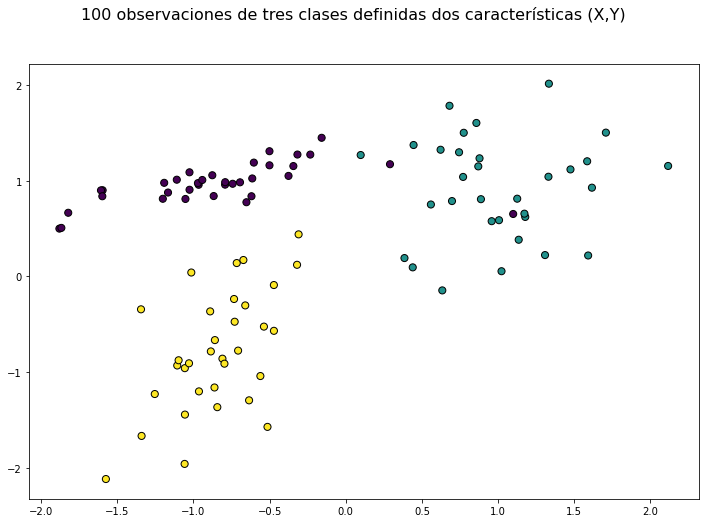

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, class_sep=0.95,
                             n_clusters_per_class=1,
                             random_state=11) #7

#sns.set_style("whitegrid")


fig = plt.figure(figsize=(12, 8))
fig.suptitle("100 observaciones de tres clases definidas dos características (X,"
          "Y)",size = 16)
plt.subplot(111)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=50,
            edgecolor='k');

#markers = {"Clase 1": "0", "Clase 2": "1", "Clase 3": "2"}
#sns.relplot(x=X1[:, 0], y=X1[:, 1], hue=Y1, style=Y1);

A partir de este conjunto de datos se ha generado un árbol de
decisión. A continuación se puede observar en detalle el resultado de
este proceso:

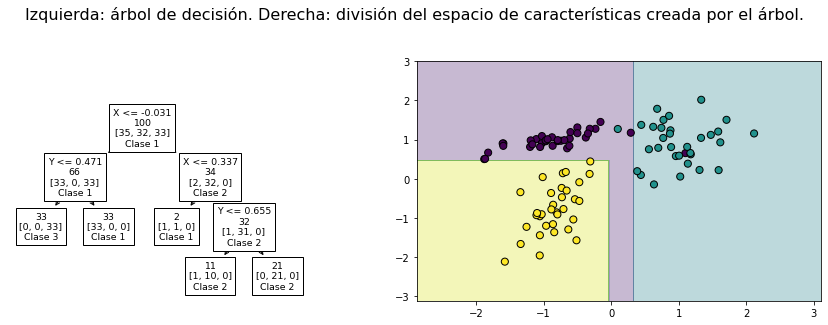

In [3]:
from sklearn import tree
import numpy as np

fig = plt.figure(figsize=(12, 8))
clf = tree.DecisionTreeClassifier(min_samples_split=12)
clf = clf.fit(X1, Y1)
fig.suptitle("Izquierda: árbol de decisión. Derecha: división del espacio de "
             "características creada por el árbol.",size=16)
plt.subplot(221)
tree.plot_tree(clf,
               label=None,
               impurity=False,
               class_names= ["Clase 1", "Clase 2", "Clase 3"],
               feature_names=["X","Y"]
               );


plot_step = 0.01

x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



plt.subplot(222)
#plt.title("División del espacio de características creada por el árbol")
plt.contourf(xx, yy, Z,  alpha=0.3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=50,
            edgecolor='k');

Las dos figuras superiores ilustran de forma clara el funcionamiento de esta
técnica. En primer lugar tenemos que a partir de las observaciones del conjunto de
entrenamiento se realizan contínuas subdivisiones del espacio de
características. Podemos ver reflejadas las reglas de los nodos internos de
la figura de la izquierda en las rectas que separan las diferentes regiones del
gráfico de la derecha. En  segundo lugar es necesario comentar que las regiones
que observamos con diferentes colores se corresponden con los nodos hoja del
árbol.

De una manera más formal podemos definir estas regiones como:
* $ R_{amarillo} = \{ X | x \leq -0.031, y \leq 0.471 \} $,
* $ R_{verde} =  \{ X | x > 0.337 \} $,
* $ R_{lila} = \{ X | x \leq -0.031, y > 0.471 || -0.031 < x < 0.471 \} $.

A partir del análisis del árbol anterior la interpretación del modelo
es una tarea sencilla. Por ejemplo, determinar que la regla más
relevante a la hora de decidir a que clase pertenece una observación es si el
 valor de la componente $X$ es  mayor o menor a -0.031.

#### Construcción

Si resumimos lo explicado hasta ahora, el proceso de construcción de un árbol
y la posterior fase de clasificación se puede describir en dos pasos:

1. Dividir el espacio de $p$ características al que llamaremos $X_1, X_2,
\ldots, X_p$  en $J$ regiones  cuya intersección es vacía. Llamaremos a
estas regiones $R_1, R_2, \ldots, R_J$

2. Cuando queremos clasificar una nueva observación, usaremos las reglas que
definen los diferentes nodos del árbol en sentido descendente para conocer en
que region de las anteriormente definidas ($R_1, \ldots, R_J$) se encuentra.
Finalmente, la nueva observación, se etiquetará con la clase que mas muestras
 del conjunto de entrenamiento se encuentran en dicha región.

En teoría, las regiones podrían tener cualquier forma. Sin embargo, elegimos
dividir el espacio de características en rectángulos en el caso anterior o en
hipercubos en aquellos casos en los que tenemos más de dos dimensiones. Tomamos
esta decisión por simplicidad de cálculo y facilidad de interpretación del modelo
resultante.

A pesar de la sencillez con la que se puede resumir el proceso de
construcción de un árbol, es necesario establecer una metodología que permita
dividir el espacio de características en las diferentes regiones. O
traducido directamente a la construcción del árbol, es necesario saber que
característica elegir en cada paso de la construcción  del
árbol y que umbral debemos seleccionar.

#### División binaria recursiva

Realizar todas las combinaciones posibles de las diferentes particiones del
espacio de características para encontrar el mejor árbol de decisión es un
problema NP completo {cite}`laurent1976constructing`, por este motivo adoptamos
un enfoque descendente y ávido conocido como **división binaria
recursiva**. La división binaria recursiva es descendente (_top
down_) porque se inicia en el nodo raíz del árbol en cuyo punto todas las
observaciones pertenecen a una sola región. Luego divide sucesivamente el
espacio de características, donde cada división se corresponde con dos nuevas
ramas del árbol. El algoritmo es ávido (_greedy_) porque en cada paso del
proceso de construcción del árbol se realiza la mejor división posible en
ese momento sin evaluar si existen otras decisiones que puedan conducir a
obtener un mejor árbol de clasificación en el futuro.

Esta técnica se realiza mediante la selección de una característica, $X_j$ y
el umbral asociado a esta,$s$ tal que el espacio de  características quede
dividido en las regiones $\{X| X_j < s \}$ y $\{X| X_j \geq s \}$,  la
notación $\{X| X_j < s \}$ indica la región del espacio de características
en la que $X_j$ toma un valor menor que $s$.

El algoritmo considera todas las características $X_1, X_2, \ldots, X_p$ y todos
los valores posibles para cada una de ellas. Entonces, se elige la
característica $X_j$ y el valor, $s$, de manera que el árbol resultante
minimice  el error de clasificación. Definiremos el  **error de
clasificación** en una región como
la fracción de las observaciones del conjunto de entrenamiento en esa región
que no pertenecen a la clase más común. El error de clasificación viene
definido por:

<center>

$$E = 1 - \max_{k}(\widehat{p}_{mk}) $$

</center>

donde $ \widehat{p}_{mk} $ representa la proporción de observaciones de
entrenamiento  en la región que se evalua y que pertenecen a la clase $k$. Sin
embargo, el error de clasificación no es lo suficientemente sensible para la
creación de árboles y, en la práctica, se usan otras dos medidas:


* **Índice Gini**: Se define como una medida de la varianza total entre  las
diferentes clases, $K$. Su formulación es la siguiente:

<center>

$$G = \sum_{k=1}^{K} \widehat{p}_{mk}(1 - \widehat{p}_{mk})$$

</center>

El índice Gini tiene un valor pequeño si todos los $ \widehat{p}_{mk} $ están
cerca de cero o cerca de uno. Por esta razón, este índice se conoce como
una medida de pureza del nodo, un valor pequeño de este valor indica que un
nodo contiene predominantemente  observaciones de una sola clase. Es usado
por el algoritmo CART {cite}`breiman1984classification`.

* **Entropía**: Entendida como la cantidad de desorden que contiene un
sistema, en nuestro caso la región evaluada. Su formulación es la siguiente:

<center>

$$E = -\sum_{k=1}^{K} \widehat{p}_{mk}\log\widehat{p}_{mk}$$

</center>

Como el valor de $\widehat{p}_{mk}$ se encuentra en el rango [0, 1], podemos
deducir que $ 0 \leq  - \widehat{p}_{mk}\log\widehat{p}_{mk} $. Además se puede
comprobar que la entropía tomará un valor cercano a cero si todos los valores
$\widehat{p}_{mk}$ están todos cerca de cero o cerca de uno. Por lo tanto,
tal como sucede con el índice de Gini, la entropía tomará un valor pequeño si
mayoritariamente contiene muestras de una sola clase. De hecho, el índice
Gini y la entropía son bastante similares numéricamente. Es usado por el
algoritmo  C4.5 {cite}`quinlan2014c4`.

En resumen, el proceso de construcción de un árbol empieza creando una
primera partición del espacio de caracteristicas seleccionando aquella
que junto con un valor umbral que nos permita maximizar la medida de
evaluación usada, ya sea el índice Gini o la Entropía. Repetiremos este
proceso, buscando otra vez la característica con el valor umbbral para
seguir dividendo el conjunto de entrenamiento. Sin embargo, esta vez,
en lugar de dividir todo el espacio de características, dividiremos una de las
dos regiones que hemos creado en el primer paso.

Este proceso se podria repetir hasta que llegamos a un punto en el que todas
las regiones contienen muestras de una sola clase. Sin embargo esta política
nos lleva a sobreajustar nuestro modelo (_overfitting_) y es preferible
definir criterios que permitan parar el proceso de construcción del árbol
antes de llegar al punto antes mencionado (ver sección {ref}`sobreajuste`).

Una vez que se han creado las regiones $R_1, \ldots, R_J$ podemos predecir
la respuesta para una observación de test evaluando cual es la clase
dominante en el la región a la que pertenece esa observación de test.


#### Un ejemplo de clasificación

A continuación, realizaremos un ejemplo de construcción y posterior
clasificación de un árbol de decisión, con un conjunto de datos con el que ya
hemos trabajado anteriormente, el conjunto de datos _Iris_.

La libreria _sklearn_ posee el módulo _tree_ donde encontramos la clase que nos
permite usar árboles de decisión para clasificar _DecisionTreeClassifier_.
Además necesitaremos las librerias que ya conocemos y que nos permiten cargar
el conjunto de datos, crear el conjunto de entrenamiento y las métricas de
clasificación:

In [4]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


**NOTA**: Tota aquesta part de codi s'ha d'unificar amb el que es faci als
capitols anteriors, ho deixo amb iris, train_test_split i amb el classification
report per tenir una idea del que vull posar aquí, faré el mateix a regressió
 amb el dataset de boston

A continuación tenemos el código necesario realizar este proceso:

In [5]:

data = load_iris() #return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    test_size=0.2,
                                                    random_state=33)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predicciones = clf.predict(X_test)

print(classification_report(y_test, predicciones, target_names=data.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.67      1.00      0.80         8
   virginica       1.00      0.71      0.83        14

    accuracy                           0.87        30
   macro avg       0.89      0.90      0.88        30
weighted avg       0.91      0.87      0.87        30



Esta misma libreria _tree_ permite obtener un gráfico con  el árbol de
clasificación resultante, usando el método _plot_tree_:


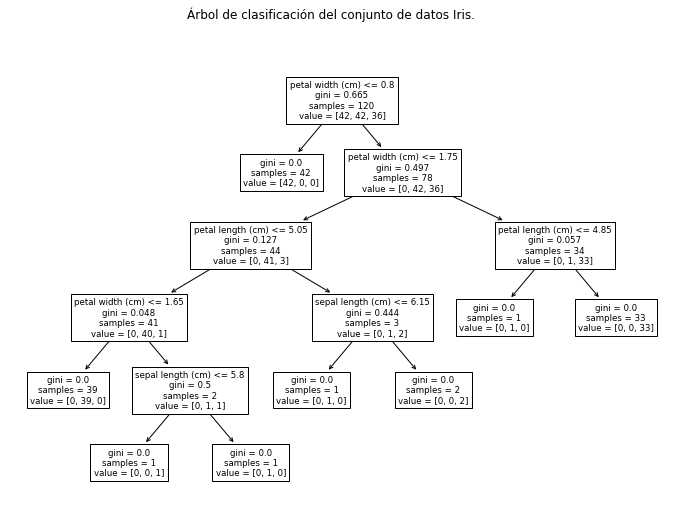

In [6]:
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Árbol de clasificación del conjunto de datos Iris.", size = 16)

tree.plot_tree(clf, feature_names=data.feature_names);

En cada nodo del árbol tenemos la información  necesaria para su
interpretación. En primer lugar, la característica usada para dividir el
conjunto junto al valor de división seleccionado. En segundo lugar, el valor
del índice Gini que es el criterio de división que se usa por defecto. A
continuación, el  número de  elementos del conjunto de entrenamiento en esta
partición y finalmente el número de elementos de cada clase. En este caso los
nodos hoja del árbol son nodos puros, ya que contienen observaciones de una
única clase.

_Depen de l'exemple que fem adalt interessaria posar això_:
Al interpretar los resultados de un árbol de clasificación, puede que también
estamos interesados no solo en la predicción de clase correspondiente a una
región de nodo terminal particular, sino también en las  proporciones de
clase  entre las observaciones de entrenamiento que caen  en esa región.

(sobreajuste)=
#### Sobreajuste
**NOTA:** mirar com usar el terme sobreajuste o overfitting.


Los árboles de decisión resultantes del proceso de construcción descrito en las
secciones anteriores tienden a ajustarse demasiado al conjunto de
entrenamiento. Como consecuencia, se genera un sobreajuste que reduce la
capacidad predictiva del modelo cuando lo aplicamos a nuevos datos. La razón
de este comportamiento es debido a la  facilidad con la que los árboles se
ramifican construyendo estructuras profundas, creando reglas de decisión
demasiado específicas.

**NOTA**: Aquí seria molt senzill fer un exemple de sobreajustament.


Existen dos estrategias para prevenir el problema de overfitting de los
árboles:  limitar el tamaño del árbol y el proceso de podado, conocido
como _pruning_.

##### Limitar el tamaño del árbol

El tamaño final que adquiere un árbol puede controlarse mediante parámetros que
que detengan su crecimiento  dependiendo de si se cumplen o no
determinadas condiciones. El valor de estos parámetros tiene que ser
especificado por el usuario en base a su conocimiento del problema. En
problemas más complejos, se obtienen los valores que permiten maximizar el
modelo mediante la técnica de la validación cruzada.

Los parámetros más comunes son los siguientes:

* Profundidad máxima del árbol.

* Observaciones mínimas para división: define el número mínimo de
observaciones que debe tener un nodo para poder ser dividido. Cuanto mayor el
valor, menos flexible es el modelo.

* Observaciones mínimas para considerar un nodo terminal: define el número
mínimo de observaciones que deben tener los nodos terminales.

* Reducción mínima del error: define la reducción mínima del error que tiene
que aportar una división para que esta se lleve a cabo.

##### Podado (_pruning_)

Otra alternativa usada para evitar el sobreajuste del método, consiste en
generar  árboles grandes, sin limitar su tamaño, para después podarlos. En el
proceso de poda únicamente se mantiene la estructura que consigue mantener un
error bajo con el conjunto de test. La selección del subárbol óptimo podría
hacerse mediante validación cruzada, sin embargo, debido a todas las
combinaciones existentes esto no es una solución válida.

El algoritmo de podado que se usa para podar árboles de decisión  es conocido
como _Cost complexity pruning_ (posar ref amb  mes info). Un proceso
iterativo en el que se genera un conjunto de árboles, en los que a
cada paso se substituye un subàrbol por un nodo hoja, al final del proceso
llegamos a tener un árbol que solo contiene el nodo raíz. De este conjunto, se
selecciona aquel árbol que tiene mejor desempeño usando el conjunto de
entrenamiento o
la validación cruzada.


### Árboles de regresión
Podemos diferenciar las técnicas de regresión de las de
clasificación por la respuesta esperada de la técnica de aprendizaje. Cuando
aplicamos  la regresión esperamos un valor cuantitativo, en cambio como como
hemos analizado en la sección anterior la respuesta de un clasificador esperamos
 un valor cualitativo.

Vamos a definir los árboles de regresión a partir de la comparación con los
árboles de clasificación. Empezaremos recordando que para un árbol de
clasificación, predecimos que una observación del conjunto de test pertenece
a la clase  predominante en la región a la que esta pertenece.  En cambio
para un árbol de regresión, la respuesta predicha para una
observación vendrà dada por el valor medio  de las observaciones
del conjunto de entrenamiento que pertenecen al mismo nodo terminal. Es decir
a la misma región.

La manera de hacer crecer un árbol de regresión es bastante similar a la
manera de hacer crecer un árbol de clasificación, utilizaremos la división
binaria recursiva  descendente. Sin embargo, a la hora de dividir un nodo no
usaremos los criterios anteriormente explicados, índice Gini o Entropía, sino
que usaremos otro criterio.

Para definir una nueva partición,la solución óptima consistiría en dividir el
espacio de características en regiones $R_1, R_2, \ldots, R_J$ que minimicen la
siguiente función:

<center>

 $$ \sum_{J}^{j=1} \sum_{i \epsilon R_j}(y_i - \widehat{y}_{R_j}) $$

</center>

en la que $\widehat{y}_{R_j}$ es la media de los valores en la región. Pero
tal como sucede en los árboles de clasificación no es posible evaluar todas
las combinaciones posibles y por lo tanto el proceso,  consistirá en
buscar la característica, $X_j$ y el valor asociado, $s$ que definen las
regiones: $ R_1(j, s) = \{ X | X_j < s\}$ y $R_2(j, s) = \{ X | X_j \geq s\}$
tal que estas minimizan la siguiente ecuación:

<center>

 $$ \sum_{i:x_i \epsilon R_1(j,s)}(y_i -\widehat{y}_{R_1})^2 + \sum_{i:x_i \epsilon R_2(j,s)}(y_i -\widehat{y}_{R_2})^2 $$

</center>

donde $\widehat{y}_{R_1}$ es el valor medio de las muestras en $ R_1(j,s)$ y
$\widehat{y}_{R_2}$ es el valor medio de las muestras en $ R_2(j,s)$.
Encontrar los valores de $j$ y $s$ que minimizan la ecuación anterior se puede
realizar con bastante rapidez, especialmente cuando el número de
características no es demasiado elevado.



#### Un ejemplo de regresión

El mismo módulo _tree_ de la libreria _sklearn_  tambien define la clase
_DecisionTreeRegressor_, esta tiene un funcionamiento y una parametrización
análogos al que ya hemos visto en el ejemplo de clasificación.

Vamos a proceder a describir ....conjunto de datos Boston, década de los 70's

In [7]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

El siguiente código nos permite seleccionar dos características del conjunto
de datos, esto permitirá analizar la técnica de regresión en detalle.

Las características seleccionadas son el número de habitaciones de cada casa
(**RM**) y la proporción de adultos sin alguna educación secundaria y
proporción de trabajadores varones clasificados como jornaleros (**LSTAT**)


In [8]:
data = load_boston()

boston = pd.DataFrame(data.data, columns=data.feature_names)
X = np.c_[boston['RM'], boston['LSTAT']]
y = data.target

Separamos el conjunto de datos en entrenamiento y test. Aprovechamos para
visualizar el problema a resolver.

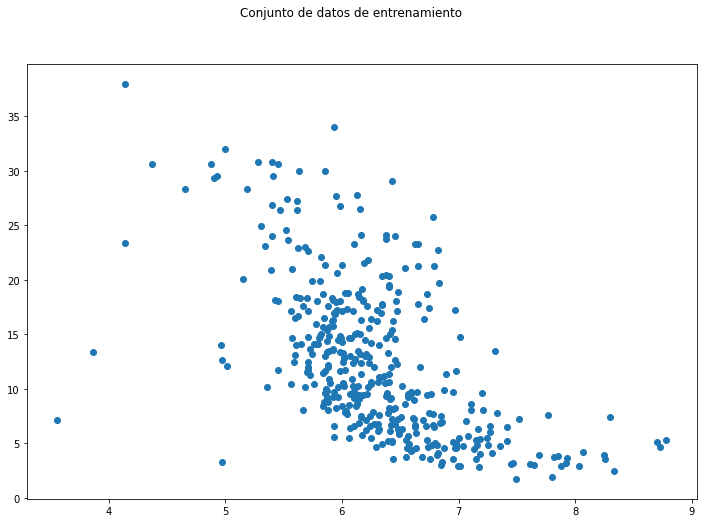

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=5)

fig = plt.figure(figsize=(12, 8))
fig.suptitle("Conjunto de datos de entrenamiento", size = 16)
# TODO: posar info al gràfic
plt.scatter(X_train[:,0], X_train[:,1]);

En este caso, evitaremos el sobreajuste del modelo limitando la profundidad
del árbol a cuatro niveles, vemos que el parámetro que se usa para este objetivo
es el de _max_depth_. Ajustamos el modelo y predecimos los resultados:

**NOTA**: No se fer cursives amb _

In [10]:
regressor = tree.DecisionTreeRegressor(max_depth=4, random_state=33)
regressor.fit(X_train, y_train)

predicciones = regressor.predict(X_train)

Evaluamos los resultados:


**NOTA**: això només és orientatiu

In [11]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = (np.sqrt(mean_squared_error(y_train, predicciones)))
r2 = r2_score(y_train, predicciones)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = regressor.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 3.880595568673668
R2 score is 0.8246947104163245


The model performance for testing set
--------------------------------------
RMSE is 4.243000322031648
R2 score is 0.7700579620002648


Más allá de los resultados obtenidos es interesante ver como queda el árbol
de regresión:


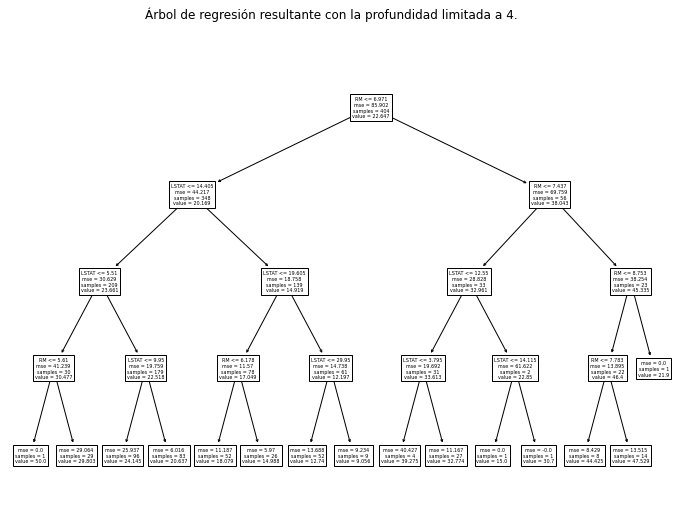

In [12]:
fig = plt.figure(figsize=(12,8))
fig.suptitle("Árbol de regresión resultante con la profundidad limitada a 4"
             ".", size = 16)

tree.plot_tree(regressor, feature_names=["RM","LSTAT"]);


Por otra parte tal como hemos hecho con en el caso de clasificación, veamos
como este ha dividido divide el espacio de características:

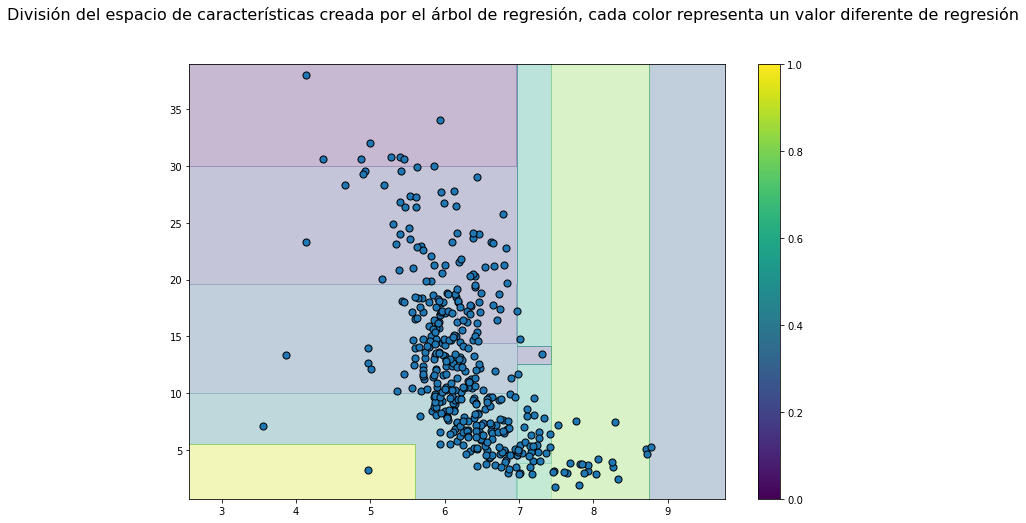

In [15]:
plot_step = 0.01
fig = plt.figure(figsize=(12,8))

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5);
Z = regressor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


fig.suptitle("División del espacio de características creada por el árbol de "
             "regresión, cada color representa un valor diferente de "
             "regresión", size = 16)
plt.contourf(xx, yy, Z,  alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
            s=50,
            edgecolor='k')

plt.colorbar();


**TODO:** Explicar la divisió del espai, aquí no podem fer la assignació color =
clase.

### Resumen

**NOTA:** En el Hastie aquí vendria lo de la linealitat, però clar això queda
 bé en casos bidimensionals després és molt dificil de veure i per tant de
 moment no ho poso.

En esta primera parte del capítulo hemos descubierto una nueva metodología
que sirve tanto para resolver problemas de clasificación como problemas de
regresión mediante el uso de árboles de decisión que en su implementación en
Python son binarios.

Podemos resumir sus ventajas e inconvenientes en los siguientes puntos:


**Ventajas**

* Los árboles se pueden mostrar gráficamente y son fácilmente interpretables
incluso por personas no expertan en inteligencia artificial.

* Se pueden utilizar con datos categóricos, sin tener que aplicar
técnicas de transformación o creación de variables fictícias.

* Es un modelo no paramétrico, en el que no se necesita realizar supuestos
acerca de como son los datos.

* La selección de las características se realiza sin la intervención humana: las
características poco relevantes no influyen en el resultado final.

* Normalmente no se ven muy influenciados por _outliers_.

**Desventajas**

* Los árboles generalmente no tienen el mismo nivel de
precisión que algunos de los otros métodoes de clasificación y de
regresión que hemos tratado anteriormente.

* Al ser un algoritmo ávido, no obtenemos el mejor árbol posible.

* Esta tècnica tiende a crear modelos sobreajustados (_overfitting_) sobre el
conjunto de entrenamiento.

* Cuando tratan con variables continuas, pierden parte de su información al
categorizarlas en el momento de la división de los nodos. Por esta razón,
suelen ser modelos que consiguen mejores resultados en clasificación que en
regresión.

A continuación, en la segunda parte del capítulo, veremos que tres técnicas
diferentes para agregar muchos árboles de decisión, aumentando la
capacidad de predicción obtenida hasta ahora.
